In [8]:
from eda_imports import *
from adjustText import adjust_text

In [9]:
df_gb = pd.read_csv('../benchmark_transcriptome/tcga-run-4/benchmark-gradboost.pr_curve.csv')
df_gb['clf_type'] = 'gradboost'

In [10]:
df_dt = pd.read_csv('../benchmark_transcriptome/tcga-run-4/benchmark-dt.pr_curve.csv')
df_dt['clf_type'] = 'dt'

In [13]:
df_dt.head(2)

,recall,prec,f1,threshold,tree_max_depth,sample_id,clf_type
0,0.242732,0.026774,0.048228,0.00,1,HBRC4,dt
1,0.071417,0.729932,0.130105,0.05,1,HBRC4,dt


In [58]:
df_am = pd.read_csv('../benchmark_transcriptome/tcga-run-4/benchmark-automl.pr_curve.csv')
df_am['clf_type'] = 'automl'

In [59]:
df_am['prec'] = df_am.prec.astype(float)
df_am['recall'] = df_am.recall.astype(float)

In [60]:
df_am.head(2)

,recall,prec,f1,threshold,tree_max_depth,sample_id,clf_type
0,0.242732,0.026774,0.048228,0.00,0,HBRC4,automl
1,0.242732,0.026774,0.048228,0.05,0,HBRC4,automl


In [61]:
df_cat = pd.concat([df_gb, df_dt, df_am], sort=False)

In [62]:
df_k2dt = pd.read_csv('../kleat3_dev/preds_kleat2_whole_transcriptome.csv', sep='\t', header=None,
                 names=['sample_id', 'tree_max_depth', 'precision', 'recall', 'f1'])
df_k2dt['program'] = 'KLEAT2+DT'
df_k2dt.sample_id = df_k2dt.sample_id.replace({
    'UHRR-C1_S1_RNABloom': 'UHRC1',
    'UHRR-C2_S2_RNABloom': 'UHRC2',
    'Brain-C6_S4_RNABloom': 'HBRC6',
    'Brain-C4_S3_RNABloom': 'HBRC4',
})

In [63]:
ndf_k2dt = df_k2dt.query('tree_max_depth == 7')

In [64]:
ndf_k2dt

,sample_id,tree_max_depth,precision,recall,f1,program
20,HBRC4,7,0.847618,0.109956,0.194660,KLEAT2+DT
21,HBRC6,7,0.839193,0.100916,0.180166,KLEAT2+DT
22,UHRC1,7,0.837958,0.089243,0.161307,KLEAT2+DT
23,UHRC2,7,0.832997,0.092322,0.166221,KLEAT2+DT


0,1,2,3,

Text(0.5,1.01,'KARBOR+GradientBoostingClassifier')

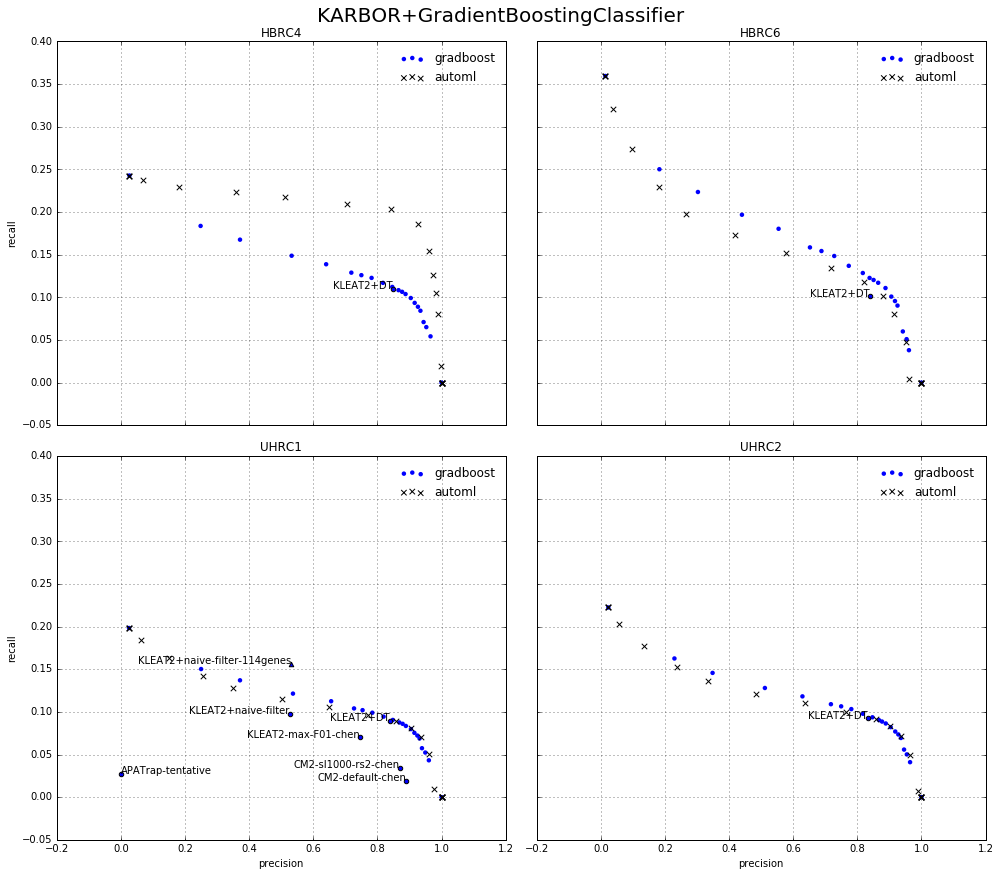

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12), 
                         sharex=True, sharey=True
                        )
axes = axes.ravel()

color_dd = dict(zip(depths, ['blue', 'red', 'magenta', 'green', 'cyan', 'yellow', 'black']))

for k, sid in enumerate(sids):
    print(k, end=',')
    ax = axes[k]
    
#     for depth in depths:
    _df = df_cat.query('clf_type == "gradboost"').query(f'tree_max_depth == 2').query(f'sample_id == "{sid}"')
    _df.plot.scatter('prec', 'recall', marker='o', alpha=1,
                    edgecolor='none', color='blue', ax=ax, label=f'gradboost')
    
    _df = df_cat.query(f'clf_type == "automl"').query(f'sample_id == "{sid}"')
    _df.plot.scatter('prec', 'recall', marker='x', alpha=1, s=30,
                    edgecolor='none', color='black', ax=ax, label=f'automl')

    k2dt_vals = ndf_k2dt.query(f'sample_id == "{sid}"')[['precision', 'recall']].values[0]
    ax.scatter([k2dt_vals[0]], [k2dt_vals[1]])
    txt = ax.text(k2dt_vals[0], k2dt_vals[1], 'KLEAT2+DT', ha='right')
    
    
    if sid == "UHRC1":
        k2_nf_prec, k2_nf_recall = [0.5264736297828335, 0.098001848001848]
        ax.scatter([k2_nf_prec], [k2_nf_recall])
        txt = ax.text(k2_nf_prec, k2_nf_recall, 'KLEAT2+naive-filter', ha='right')
        
        k2_nf_prec_114genes, k2_nf_recall_114genes = [0.530055, 0.156704]
        ax.scatter([k2_nf_prec_114genes], [k2_nf_recall_114genes], marker='^')
        txt = ax.text(k2_nf_prec_114genes, k2_nf_recall_114genes, 'KLEAT2+naive-filter-114genes', ha='right')
        
        apatrap_prec, apatrap_recall = [0.0007928734667226342, 0.027463651050080775]
        ax.scatter([apatrap_prec], [apatrap_recall])
        txt = ax.text(apatrap_prec, apatrap_recall, 'APATrap-tentative')
        
        # slight overestimate based on the graph
        cm2_default = [0.89, 0.019]
        ax.scatter([cm2_default[0]], [cm2_default[1]])
        txt = ax.text(cm2_default[0], cm2_default[1], 'CM2-default-chen', ha='right')
        
        cm2_sl1000_rs2 = [0.87, 0.034] 
        ax.scatter([cm2_sl1000_rs2[0]], [cm2_sl1000_rs2[1]])
        txt = ax.text(cm2_sl1000_rs2[0], cm2_sl1000_rs2[1], 'CM2-sl1000-rs2-chen', ha='right')
        
        k2_chen = [0.745, 0.07]
        ax.scatter([k2_chen[0]], [k2_chen[1]])
        txt = ax.text(k2_chen[0], k2_chen[1], 'KLEAT2-max-F01-chen', ha='right')

        
    ax.set_title(sid)
    
    ax.set_xlabel('precision')
    ax.set_ylabel('recall')
    ax.grid()
    
    ax.legend(loc='best', framealpha=0)
    
#     ax.set_xlim(0.55, 0.95)
#     ax.set_ylim(0.02, 0.16)
    
#     adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))
plt.tight_layout()
plt.suptitle('KARBOR+GradientBoostingClassifier', y=1.01, fontsize=20)

# UHRC1 only

Text(0.5,1,'KARBOR+GradientBoostingClassifier')

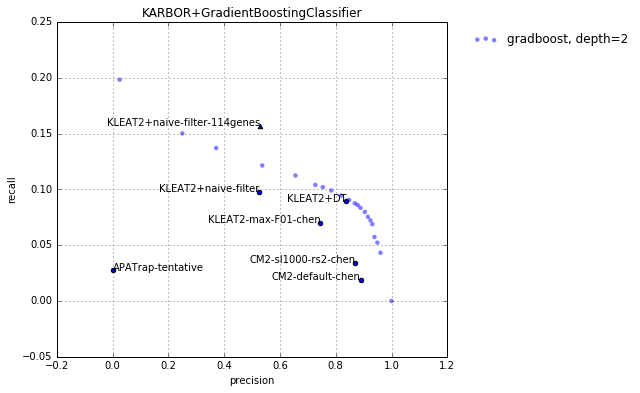

In [23]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111)

sids = np.sort(df_cat.sample_id.unique())
# depths = np.sort(df_cat.tree_max_depth.unique())
depths = [2] + np.arange(5, 10).tolist()

color_dd = dict(zip(depths, ['blue', 'red', 'magenta', 'green', 'cyan', 'orange', 'yellow', 'black']))
marker_dd = {
    'gradboost': 'o',
    'dt': 'x'
}

sid = 'UHRC1'


for clf_type in [
    'gradboost', 
#     'dt', 
]:
    for depth in depths:
        _df = df_cat.query(f'tree_max_depth == "{depth}"')\
            .query(f'sample_id == "{sid}"')\
            .query(f'clf_type == "{clf_type}"')
        if _df.shape[0] == 0:
            continue
        color = color_dd.get(depth, 'black')
        _df.plot.scatter(
            'prec', 'recall', marker=marker_dd[clf_type], alpha=0.5,
            edgecolor='none', color=color, ax=ax, label=f'{clf_type}, depth={depth}')

k2dt_vals = ndf_k2dt.query(f'sample_id == "{sid}"')[['precision', 'recall']].values[0]
ax.scatter([k2dt_vals[0]], [k2dt_vals[1]])
txt = ax.text(k2dt_vals[0], k2dt_vals[1], 'KLEAT2+DT', ha='right')

if sid == "UHRC1":
    k2_nf_prec, k2_nf_recall = [0.5264736297828335, 0.098001848001848]
    ax.scatter([k2_nf_prec], [k2_nf_recall])
    txt = ax.text(k2_nf_prec, k2_nf_recall, 'KLEAT2+naive-filter', ha='right')

    k2_nf_prec_114genes, k2_nf_recall_114genes = [0.530055, 0.156704]
    ax.scatter([k2_nf_prec_114genes], [k2_nf_recall_114genes], marker='^')
    txt = ax.text(k2_nf_prec_114genes, k2_nf_recall_114genes, 'KLEAT2+naive-filter-114genes', ha='right')

    apatrap_prec, apatrap_recall = [0.0007928734667226342, 0.027463651050080775]
    ax.scatter([apatrap_prec], [apatrap_recall])
    txt = ax.text(apatrap_prec, apatrap_recall, 'APATrap-tentative')

    # slight overestimate based on the graph
    cm2_default = [0.89, 0.019]
    ax.scatter([cm2_default[0]], [cm2_default[1]])
    txt = ax.text(cm2_default[0], cm2_default[1], 'CM2-default-chen', ha='right')

    cm2_sl1000_rs2 = [0.87, 0.034] 
    ax.scatter([cm2_sl1000_rs2[0]], [cm2_sl1000_rs2[1]])
    txt = ax.text(cm2_sl1000_rs2[0], cm2_sl1000_rs2[1], 'CM2-sl1000-rs2-chen', ha='right')

    k2_chen = [0.745, 0.07]
    ax.scatter([k2_chen[0]], [k2_chen[1]])
    txt = ax.text(k2_chen[0], k2_chen[1], 'KLEAT2-max-F01-chen', ha='right')

ax.set_title(sid)

ax.set_xlabel('precision')
ax.set_ylabel('recall')
ax.grid()

ax.legend(framealpha=0, bbox_to_anchor=(1.04,1), loc="upper left")
# ax.set_xlim(-0.025, 1.025)
# ax.set_ylim(-0.025, 0.225)

ax.set_title('KARBOR+GradientBoostingClassifier')
# plt.savefig('../benchmark_transcriptome/tcga-run-4/benchmark-with-other-tools.png', dpi=200)

# Plot best gradboost and best dt results

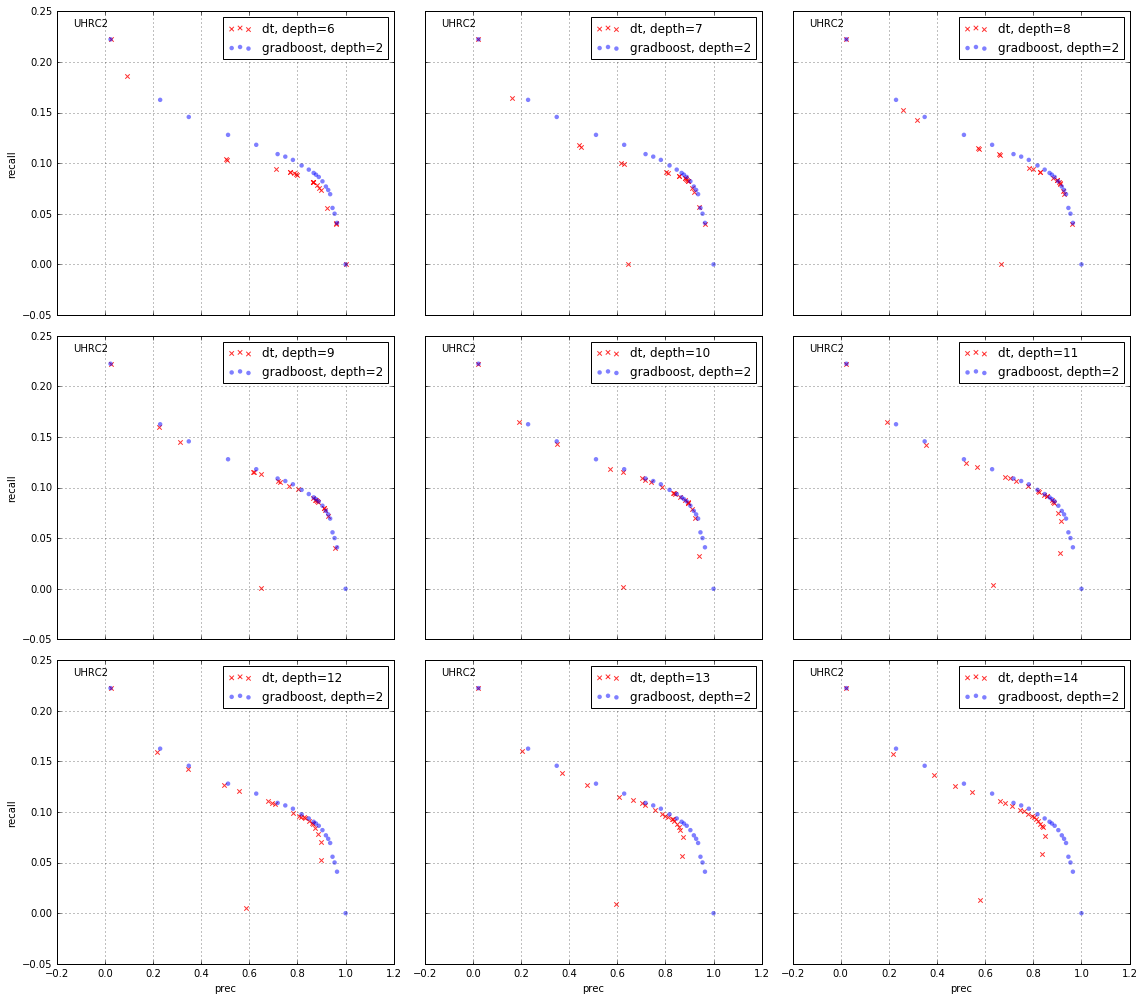

In [81]:
fig, axes = plt.subplots(3, 3, figsize=(16, 14), sharex=True, sharey=True)
axes = axes.ravel()


sid = 'UHRC2'
for k, depth in enumerate([6, 7, 8, 9, 10, 11, 12, 13, 14]):
    ax = axes[k]
    
    clf_type = 'dt'
    _df = df_cat.query(f'tree_max_depth == "{depth}"')\
        .query(f'sample_id == "{sid}"')\
        .query(f'clf_type == "{clf_type}"')
    if _df.shape[0] == 0:
        continue
    color = 'red'
    _df.plot.scatter(
        'prec', 'recall', marker=marker_dd[clf_type], alpha=0.8,
        edgecolor='none', color=color, ax=ax, label=f'{clf_type}, depth={depth}')

    clf_type = 'gradboost'
    _df = df_cat.query(f'tree_max_depth == "2"')\
        .query(f'sample_id == "{sid}"')\
        .query(f'clf_type == "{clf_type}"')

    color = 'blue'
    _df.plot.scatter(
        'prec', 'recall', marker=marker_dd[clf_type], alpha=0.5,
        edgecolor='none', color=color, ax=ax, label=f'{clf_type}, depth=2')
    
    ax.grid()
    ax.text(0.05, 0.95, sid, transform=ax.transAxes)
plt.tight_layout()

In [49]:
df_cat.query('recall < 0.02').query('prec < 0.6').query('clf_type == "dt"')\
    .query(f'tree_max_depth in {depths}')\
    .query(f'sample_id == "UHRC1"')\
    .sort_values(['recall', 'tree_max_depth'])

,recall,prec,f1,threshold,tree_max_depth,sample_id,clf_type
1154,0.000048,0.333333,0.000096,1.0,7,UHRC1,dt
1175,0.000250,0.448276,0.000500,1.0,8,UHRC1,dt
1196,0.000760,0.537415,0.001519,1.0,9,UHRC1,dt


In [ ]:
ax.text